In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv')



# Data Prepration and Cleaning

In [3]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
columns_to_drop = ["Age", "Gender", "Size", "Subscription Status", "Discount Applied", "Promo Code Used","Shipping Type", "Color", "Review Rating","Payment Method","Frequency of Purchases"]
df.drop(columns=columns_to_drop, inplace=True)


In [5]:
df.shape

(3900, 7)

In [6]:
df.columns

Index(['Customer ID', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Season', 'Previous Purchases'],
      dtype='object')

In [7]:
df.rename(columns={'Purchase Amount (USD)': 'Purchase Amount USD'}, inplace=True)

In [8]:
df.columns = df.columns.str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.replace(' ', '_')

In [9]:
df.nunique()

Customer_ID            3900
Item_Purchased           25
Category                  4
Purchase_Amount_USD      81
Location                 50
Season                    4
Previous_Purchases       50
dtype: int64

In [10]:
df.isnull().sum()

Customer_ID            0
Item_Purchased         0
Category               0
Purchase_Amount_USD    0
Location               0
Season                 0
Previous_Purchases     0
dtype: int64

In [11]:
#Checking for duplicates 
value=len(df[df.duplicated()])
print(value) 

0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Purchase_Amount_USD,3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Previous_Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


<Axes: xlabel='Purchase_Amount_USD', ylabel='Count'>

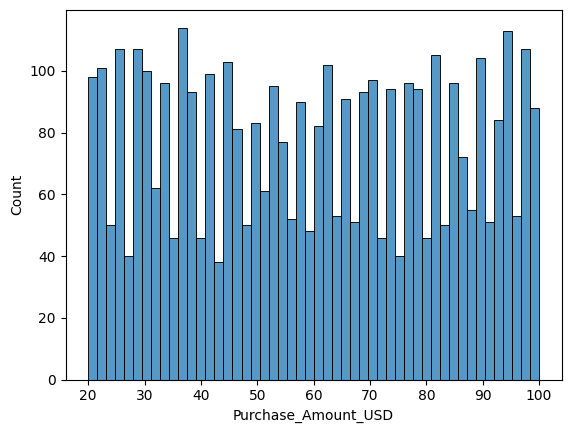

In [13]:
sns.histplot(df.Purchase_Amount_USD, bins=50)

In [14]:
category_counts = df.groupby("Location")["Category"].value_counts()
print("Regional Category Trends:\n", category_counts)

Regional Category Trends:
 Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: count, Length: 200, dtype: int64


In [15]:
location_purchase_stats = df.groupby("Location")["Purchase_Amount_USD"].agg(["mean", "median", "sum"])
print("Regional Purchase Amount Stats:\n", location_purchase_stats)

Regional Purchase Amount Stats:
                      mean  median   sum
Location                               
Alabama         59.112360    56.0  5261
Alaska          67.597222    68.5  4867
Arizona         66.553846    68.0  4326
Arkansas        61.113924    58.0  4828
California      59.000000    57.0  5605
Colorado        56.293333    51.0  4222
Connecticut     54.179487    48.5  4226
Delaware        55.325581    52.5  4758
Florida         55.852941    56.0  3798
Georgia         58.797468    62.0  4645
Hawaii          57.723077    55.0  3752
Idaho           60.075269    62.0  5587
Illinois        61.054348    65.0  5617
Indiana         58.924051    60.0  4655
Iowa            60.884058    60.0  4201
Kansas          54.555556    50.0  3437
Kentucky        55.721519    53.0  4402
Louisiana       57.714286    55.5  4848
Maine           56.987013    57.0  4388
Maryland        55.755814    52.0  4795
Massachusetts   60.888889    64.0  4384
Michigan        62.095890    63.0  4533
Minneso

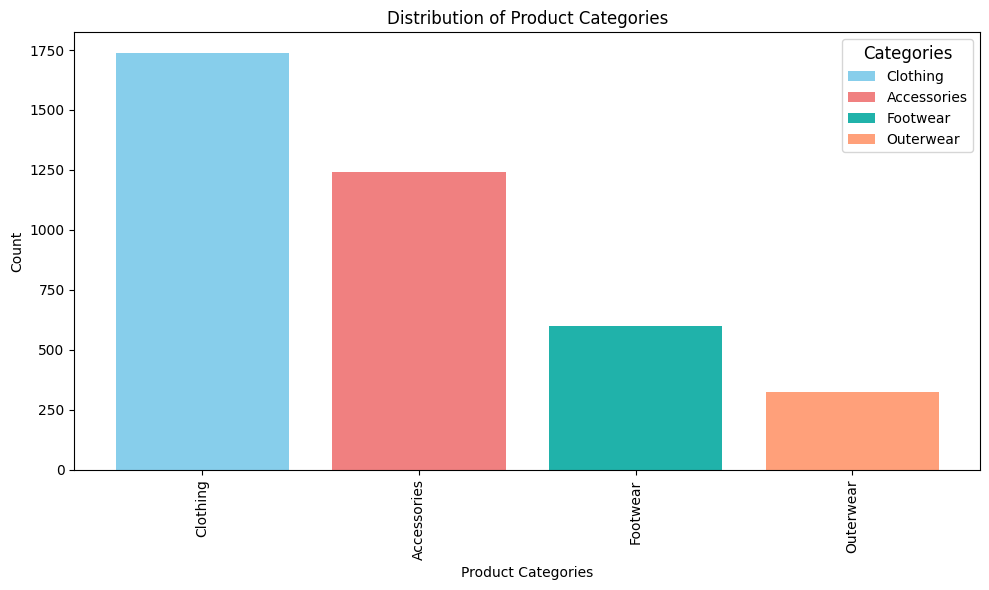

In [16]:
category_counts = df['Category'].value_counts()

# Define a list of different colors for each bar
colors = ['skyblue', 'lightcoral', 'lightseagreen', 'lightsalmon', 'lightpink']

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the bar chart with different colors for each bar
bars = plt.bar(category_counts.index, category_counts.values, color=colors)

# Add labels and title
plt.xlabel('Product Categories')
plt.ylabel('Count')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()

legend_labels = category_counts.index[:len(colors)]  # Take labels for the number of colors used
legend = plt.legend(bars[:len(colors)], legend_labels, title='Categories', loc='upper right')
plt.setp(legend.get_title(), fontsize=12)

plt.show()

<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> Clothing is the most popular categories among consumers.

In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:

# Encoding all categorical varibale to numeric values
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

df['Item_Purchased']= label_encoder.fit_transform(df['Item_Purchased'])
df['Category']= label_encoder.fit_transform(df['Category']) 
df['Location']= label_encoder.fit_transform(df['Location']) 
df['Season']= label_encoder.fit_transform(df['Season']) 


df.head()

,Customer_ID,Item_Purchased,Category,Purchase_Amount_USD,Location,Season,Previous_Purchases
0,1,2,1,53,16,3,14
1,2,23,1,64,18,3,2
2,3,11,1,73,20,1,23
3,4,14,2,90,38,1,49
4,5,2,1,49,36,1,31


In [19]:
df.corr()

,Customer_ID,Item_Purchased,Category,Purchase_Amount_USD,Location,Season,Previous_Purchases
Customer_ID,1.000000,0.003648,-0.004133,0.011048,-0.013257,-0.018027,-0.039159
Item_Purchased,0.003648,1.000000,0.052951,-0.005342,0.020390,0.012755,-0.001513
Category,-0.004133,0.052951,1.000000,-0.017841,0.000541,0.000141,-0.015669
Purchase_Amount_USD,0.011048,-0.005342,-0.017841,1.000000,0.028803,-0.018358,0.008063
Location,-0.013257,0.020390,0.000541,0.028803,1.000000,0.012259,-0.032962
Season,-0.018027,0.012755,0.000141,-0.018358,0.012259,1.000000,0.024333
Previous_Purchases,-0.039159,-0.001513,-0.015669,0.008063,-0.032962,0.024333,1.000000


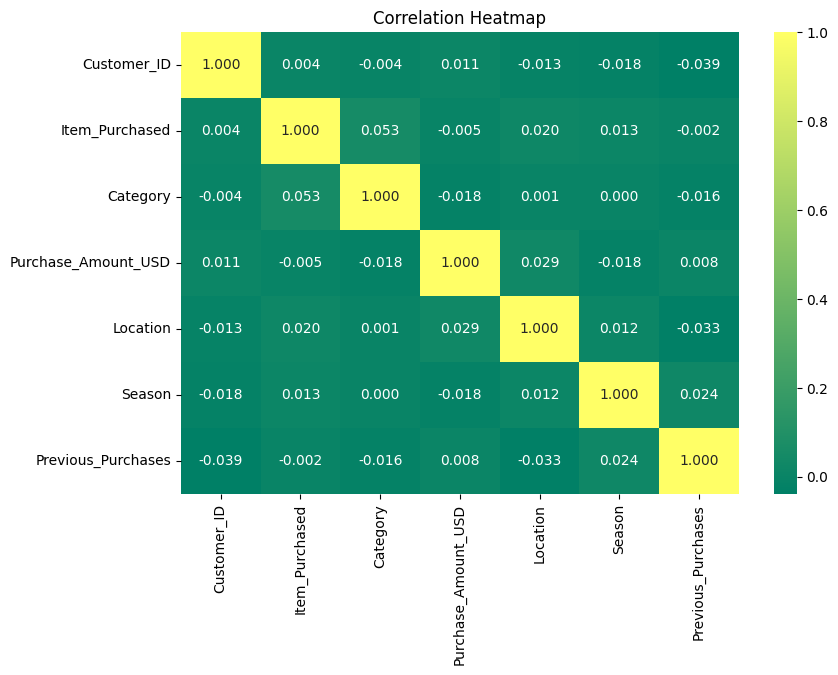

In [20]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show();

In [21]:
df.corr().unstack().sort_values(ascending = False)

Customer_ID          Customer_ID            1.000000
Item_Purchased       Item_Purchased         1.000000
Season               Season                 1.000000
Location             Location               1.000000
Category             Category               1.000000
Purchase_Amount_USD  Purchase_Amount_USD    1.000000
Previous_Purchases   Previous_Purchases     1.000000
Item_Purchased       Category               0.052951
Category             Item_Purchased         0.052951
Purchase_Amount_USD  Location               0.028803
Location             Purchase_Amount_USD    0.028803
Previous_Purchases   Season                 0.024333
Season               Previous_Purchases     0.024333
Item_Purchased       Location               0.020390
Location             Item_Purchased         0.020390
Item_Purchased       Season                 0.012755
Season               Item_Purchased         0.012755
                     Location               0.012259
Location             Season                 0.

# Modeling

<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> Linear Regression Model

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
X_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(X_full_train, test_size=0.25, random_state=1)

x_train = df_train.reset_index(drop=True)
x_val = df_val.reset_index(drop=True)
x_test = df_test.reset_index(drop=True)


y_train_org = df_train.Purchase_Amount_USD.values
y_val_org = df_val.Purchase_Amount_USD.values
y_test_org = df_test.Purchase_Amount_USD.values




In [24]:
x_train

,Customer_ID,Item_Purchased,Category,Purchase_Amount_USD,Location,Season,Previous_Purchases
0,3361,10,3,81,22,1,47
1,3527,23,1,99,20,1,1
2,1289,1,0,93,40,3,34
3,728,23,1,97,3,3,37
4,2501,6,0,84,20,0,32
...,...,...,...,...,...,...,...
2335,2223,13,1,66,9,2,30
2336,105,22,0,24,28,1,1
2337,1965,13,1,51,47,2,50
2338,3503,0,0,62,20,0,26


In [25]:
y_train = np.log1p(y_train_org)
y_val = np.log1p(y_val_org)
y_test = np.log1p(y_test_org)

In [26]:
del x_train['Purchase_Amount_USD']
del x_val['Purchase_Amount_USD']
del x_test['Purchase_Amount_USD']

In [27]:
def train_linear_regression(X, y, r=0.0):

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [28]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> Finding the least rmse score during training of linear regression

In [29]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression(x_train, y_train, r=r)
    y_pred = w_0 + x_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_pred),2)
    print(r, w_0, rmse_val)

0 3.9891362479699026 0.43
1e-06 3.9891362479699026 0.43
0.0001 3.9891362479699026 0.43
0.001 3.9891362479699026 0.43
0.01 3.9891362479699026 0.43
0.1 3.9891362479699026 0.43
1 3.9891362479699026 0.43
5 3.9891362479699026 0.43
10 3.9891362479699026 0.43


In [30]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    w_0, w = train_linear_regression(x_train, y_train, r=r)
    
    y_pred = w_0 + x_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_pred),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 3.9891362479699026 0.43
1 3.9891362479699026 0.43
2 3.9891362479699026 0.43
3 3.9891362479699026 0.43
4 3.9891362479699026 0.43
5 3.9891362479699026 0.43
6 3.9891362479699026 0.43
7 3.9891362479699026 0.43
8 3.9891362479699026 0.43
9 3.9891362479699026 0.43


<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> All rmse scores are same.

In [31]:
rmse_list


[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43]

In [32]:
r = 9

w_0, w = train_linear_regression(x_train, y_train, r=r)
y_pred = w_0 + x_val.dot(w)
rmse_val = np.round(rmse(y_val, y_pred),2)
    
rmse_list.append(rmse_val)
    
print(r, w_0, rmse_val)


9 3.9891362479699026 0.43


<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> Final rmse score= 0.44 from linear regression model

In [33]:
np.round(rmse(y_test, y_pred),2)

0.44

<right> 
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import math  
import matplotlib.pyplot as plt

In [35]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
mean_squared_error(y_val, y_pred, squared=False)

0.4896582054336761

In [36]:
from tqdm.auto import tqdm

<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> Training the Random Forest Regressor with n_estimators up to 150

In [37]:
#trained the Random Forest Regressor with n_estimators up to 150
scores = []

for n in tqdm(range(10, 151, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(x_train, y_train)
    
    y_pred = rf.predict(x_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

  0%|          | 0/15 [00:00<?, ?it/s]

In [38]:
# n_estimators 100 can provide the least rsme score
df_scores

,n_estimators,rmse
0,10,0.489658
1,20,0.480031
2,30,0.472907
3,40,0.469165
4,50,0.466583
5,60,0.467652
6,70,0.466549
7,80,0.466291
8,90,0.465166
9,100,0.465211


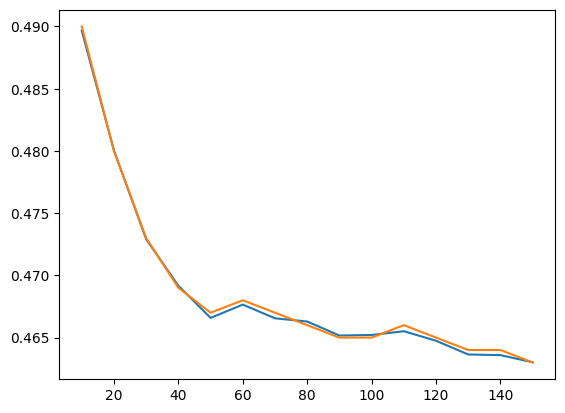

In [39]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

plt.show()

In [40]:
scores = []

rf = RandomForestRegressor(
    n_estimators=1,
    random_state=1,
    n_jobs=-1,
    warm_start=True,
)

for n in tqdm(range(10, 151, 10)):
    rf.n_estimators = n
    rf.fit(x_train, y_train)
    
    y_pred = rf.predict(x_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

  0%|          | 0/15 [00:00<?, ?it/s]

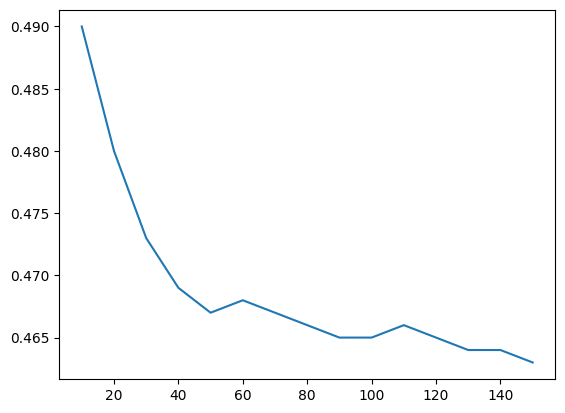

In [41]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))
plt.show()

In [42]:
# trained the model again with various depth

scores = []

for d in tqdm([10, 15, 20, 25, 30, 35]):
    rf = RandomForestRegressor(
        n_estimators=0,
        max_depth=d,
        random_state=1,
        n_jobs=-1,
        warm_start=True
    )

    for n in tqdm(range(10, 151, 10)):
        rf.n_estimators = n
        rf.fit(x_train, y_train)

        y_pred = rf.predict(x_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> max_depth=10 produced least rmse score

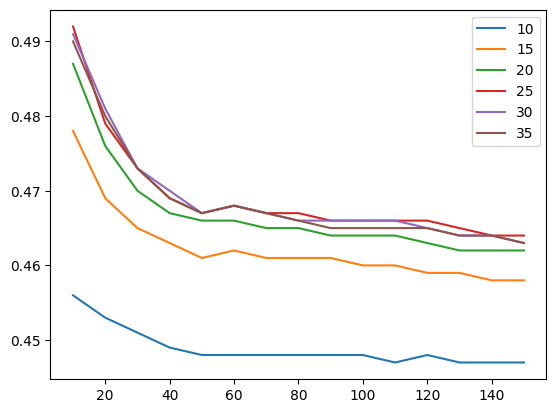

In [43]:
# max_depth=10 produced least rmse score

for d in [10, 15, 20, 25, 30, 35]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse.round(3), label=d)

plt.legend()
plt.show()

<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;"> So Finally trained again with n_estimators =100 and max_depth =10

In [44]:
#So Finally trained again with n_estimators =100 and max_depth =10
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=1,
    n_jobs=-1
)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1)

<right>
<h4 style="color:Balck; font-size:20px; font-family:Roman; border-radius: 20px;">  Final rmse score= 0.45 from RandomForest Regressor. Therefore, Linear Regression Model (rmse=0.44) is slightly better than the RandomForest Regressor

In [45]:
y_pred = rf.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

0.45026565986208045